<a href="https://colab.research.google.com/github/killcilent5/CA1-project/blob/main/Machine_learning_CA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. import library Pandas and numpy


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

2. Read Csv data using pd.read_excel

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/drive cu/D.B.S school/Machine learning CA1/Cardiovascular Diseases.csv')

In [ ]:
data.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150,32.66,14.54,Yes,0,30,16,12
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165,77.11,28.29,No,0,30,0,4
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163,88.45,33.47,No,4,12,3,16
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180,93.44,28.73,No,0,30,30,8
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191,88.45,24.37,Yes,0,8,4,0


3. Dimemsions - knowing how many rows in the dataset ( 308854 rows and 19 columns)

In [ ]:
data.shape

(308854, 19)

4. Knowing datatype in each colum

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  int64  
 12  Weight_(kg)                   308854 non-nul

5. Looking for missing value
.sum() will sum of true =1 (Boonlean data), and false will be 0

In [ ]:
data.isnull().sum()

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64

6. Cheking duplicate Values in anyrow

In [ ]:
data_duplicated = data.duplicated().any()
data_duplicated

True

In [ ]:
data = data.drop_duplicates()
data_duplicated = data.duplicated().any()
data_duplicated

False

7. Data Processing

In [ ]:
cate_val=[]
cont_val=[]
cate_val_bi=[]
for column in data.columns: #create a loop ( using Examine Unique Values to defind continous variable or catelogical variable)
  if data[column].nunique() <=2: #If the number of unique values is 13 or fewer (i.e., less than or equal to 12), the column is considered categorical, in Age_categorical columns, we have 12 differtative categorical
    cate_val_bi.append(column)
  elif 2 < data[column].nunique() <=13:
    cate_val.append(column)
  else:
    cont_val.append(column)

In [ ]:
print(f"numberical value are : {cont_val}")
print(f"categorical value are : {cate_val}")
print(f"categorical binary value are : {cate_val_bi}")

numberical value are : ['Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']
categorical value are : ['General_Health', 'Checkup', 'Diabetes', 'Age_Category']
categorical binary value are : ['Exercise', 'Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Arthritis', 'Sex', 'Smoking_History']


In [ ]:
data

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150,32.66,14.54,Yes,0,30,16,12
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165,77.11,28.29,No,0,30,0,4
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163,88.45,33.47,No,4,12,3,16
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180,93.44,28.73,No,0,30,30,8
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191,88.45,24.37,Yes,0,8,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,25-29,168,81.65,29.05,No,4,30,8,0
308850,Fair,Within the past 5 years,Yes,No,No,No,No,Yes,No,Male,65-69,180,69.85,21.48,No,8,15,60,4
308851,Very Good,5 or more years ago,Yes,No,No,No,Yes,"Yes, but female told only during pregnancy",No,Female,30-34,157,61.23,24.69,Yes,4,40,8,4
308852,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,65-69,183,79.38,23.73,No,3,30,12,0


8. Encoding Categorical Data

In [ ]:
data = pd.get_dummies(data,columns=cate_val,drop_first=True)



```
# 9. Feature scaling
```



In [ ]:
data.head()

,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Arthritis,Sex,Height_(cm),Weight_(kg),BMI,...,Age_Category_35-39,Age_Category_40-44,Age_Category_45-49,Age_Category_50-54,Age_Category_55-59,Age_Category_60-64,Age_Category_65-69,Age_Category_70-74,Age_Category_75-79,Age_Category_80+
0,No,No,No,No,No,Yes,Female,150,32.66,14.54,...,0,0,0,0,0,0,0,1,0,0
1,No,Yes,No,No,No,No,Female,165,77.11,28.29,...,0,0,0,0,0,0,0,1,0,0
2,Yes,No,No,No,No,No,Female,163,88.45,33.47,...,0,0,0,0,0,1,0,0,0,0
3,Yes,Yes,No,No,No,No,Male,180,93.44,28.73,...,0,0,0,0,0,0,0,0,1,0
4,No,No,No,No,No,No,Male,191,88.45,24.37,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
from sklearn.preprocessing import StandardScaler


In [ ]:
st = StandardScaler()
data[cont_val] = st.fit_transform(data[cont_val])
data

,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Arthritis,Sex,Height_(cm),Weight_(kg),BMI,...,Age_Category_35-39,Age_Category_40-44,Age_Category_45-49,Age_Category_50-54,Age_Category_55-59,Age_Category_60-64,Age_Category_65-69,Age_Category_70-74,Age_Category_75-79,Age_Category_80+
0,No,No,No,No,No,Yes,Female,-1.934170,-2.386099,-2.159627,...,0,0,0,0,0,0,0,1,0,0
1,No,Yes,No,No,No,No,Female,-0.526833,-0.303608,-0.051636,...,0,0,0,0,0,0,0,1,0,0
2,Yes,No,No,No,No,No,Female,-0.714478,0.227673,0.742501,...,0,0,0,0,0,1,0,0,0,0
3,Yes,Yes,No,No,No,No,Male,0.880503,0.461456,0.015819,...,0,0,0,0,0,0,0,0,1,0
4,No,No,No,No,No,No,Male,1.912549,0.227673,-0.652605,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,Yes,No,No,No,No,No,Male,-0.245366,-0.090908,0.064878,...,0,0,0,0,0,0,0,0,0,0
308850,Yes,No,No,No,No,No,Male,0.880503,-0.643740,-1.095666,...,0,0,0,0,0,0,1,0,0,0
308851,Yes,No,No,No,Yes,No,Female,-1.277413,-1.047589,-0.603547,...,0,0,0,0,0,0,0,0,0,0
308852,Yes,No,No,No,No,No,Male,1.161970,-0.197258,-0.750723,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
def map_categories(df, column_name, category_mapping):
    if column_name in df.columns:
        df[column_name] = df[column_name].map(category_mapping)
    else:
        print(f"Column '{column_name}' not found in the DataFrame.")
    return df
map_categories(data,'Sex',{'Male':1, 'Female':0})
cate_val_bi.remove('Sex')
for i in  cate_val_bi:
    data = map_categories(data, i,  {'Yes':1, 'No':0})

data

,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Arthritis,Sex,Height_(cm),Weight_(kg),BMI,...,Age_Category_35-39,Age_Category_40-44,Age_Category_45-49,Age_Category_50-54,Age_Category_55-59,Age_Category_60-64,Age_Category_65-69,Age_Category_70-74,Age_Category_75-79,Age_Category_80+
0,0,0,0,0,0,1,0,-1.934170,-2.386099,-2.159627,...,0,0,0,0,0,0,0,1,0,0
1,0,1,0,0,0,0,0,-0.526833,-0.303608,-0.051636,...,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,-0.714478,0.227673,0.742501,...,0,0,0,0,0,1,0,0,0,0
3,1,1,0,0,0,0,1,0.880503,0.461456,0.015819,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,1.912549,0.227673,-0.652605,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,1,0,0,0,0,0,1,-0.245366,-0.090908,0.064878,...,0,0,0,0,0,0,0,0,0,0
308850,1,0,0,0,0,0,1,0.880503,-0.643740,-1.095666,...,0,0,0,0,0,0,1,0,0,0
308851,1,0,0,0,1,0,0,-1.277413,-1.047589,-0.603547,...,0,0,0,0,0,0,0,0,0,0
308852,1,0,0,0,0,0,1,1.161970,-0.197258,-0.750723,...,0,0,0,0,0,0,1,0,0,0


#Spliting The Dataset into the Training Set and Test set

In [ ]:
X = data.drop('Heart_Disease',axis =1 )

In [ ]:
y = data['Heart_Disease']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from imblearn.over_sampling import SMOTE

#Logistic Regression

In [ ]:
X_res,y_res= SMOTE().fit_resample(X,y)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.2,random_state=42)

In [ ]:
data.head()

,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Arthritis,Sex,Height_(cm),Weight_(kg),BMI,...,Age_Category_35-39,Age_Category_40-44,Age_Category_45-49,Age_Category_50-54,Age_Category_55-59,Age_Category_60-64,Age_Category_65-69,Age_Category_70-74,Age_Category_75-79,Age_Category_80+
0,0,0,0,0,0,1,0,-1.934170,-2.386099,-2.159627,...,0,0,0,0,0,0,0,1,0,0
1,0,1,0,0,0,0,0,-0.526833,-0.303608,-0.051636,...,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,-0.714478,0.227673,0.742501,...,0,0,0,0,0,1,0,0,0,0
3,1,1,0,0,0,0,1,0.880503,0.461456,0.015819,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,1.912549,0.227673,-0.652605,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
from sklearn.linear_model import LogisticRegression


In [ ]:
log = LogisticRegression()
log.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred1 = log.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,y_pred1)

0.7610859569070313

In [ ]:
from sklearn.metrics import recall_score

In [ ]:
recall_score(y_test,y_pred1)

0.8089078193195561

#Draw Correlation Matrix

In [ ]:
data.corr()

<Axes: >

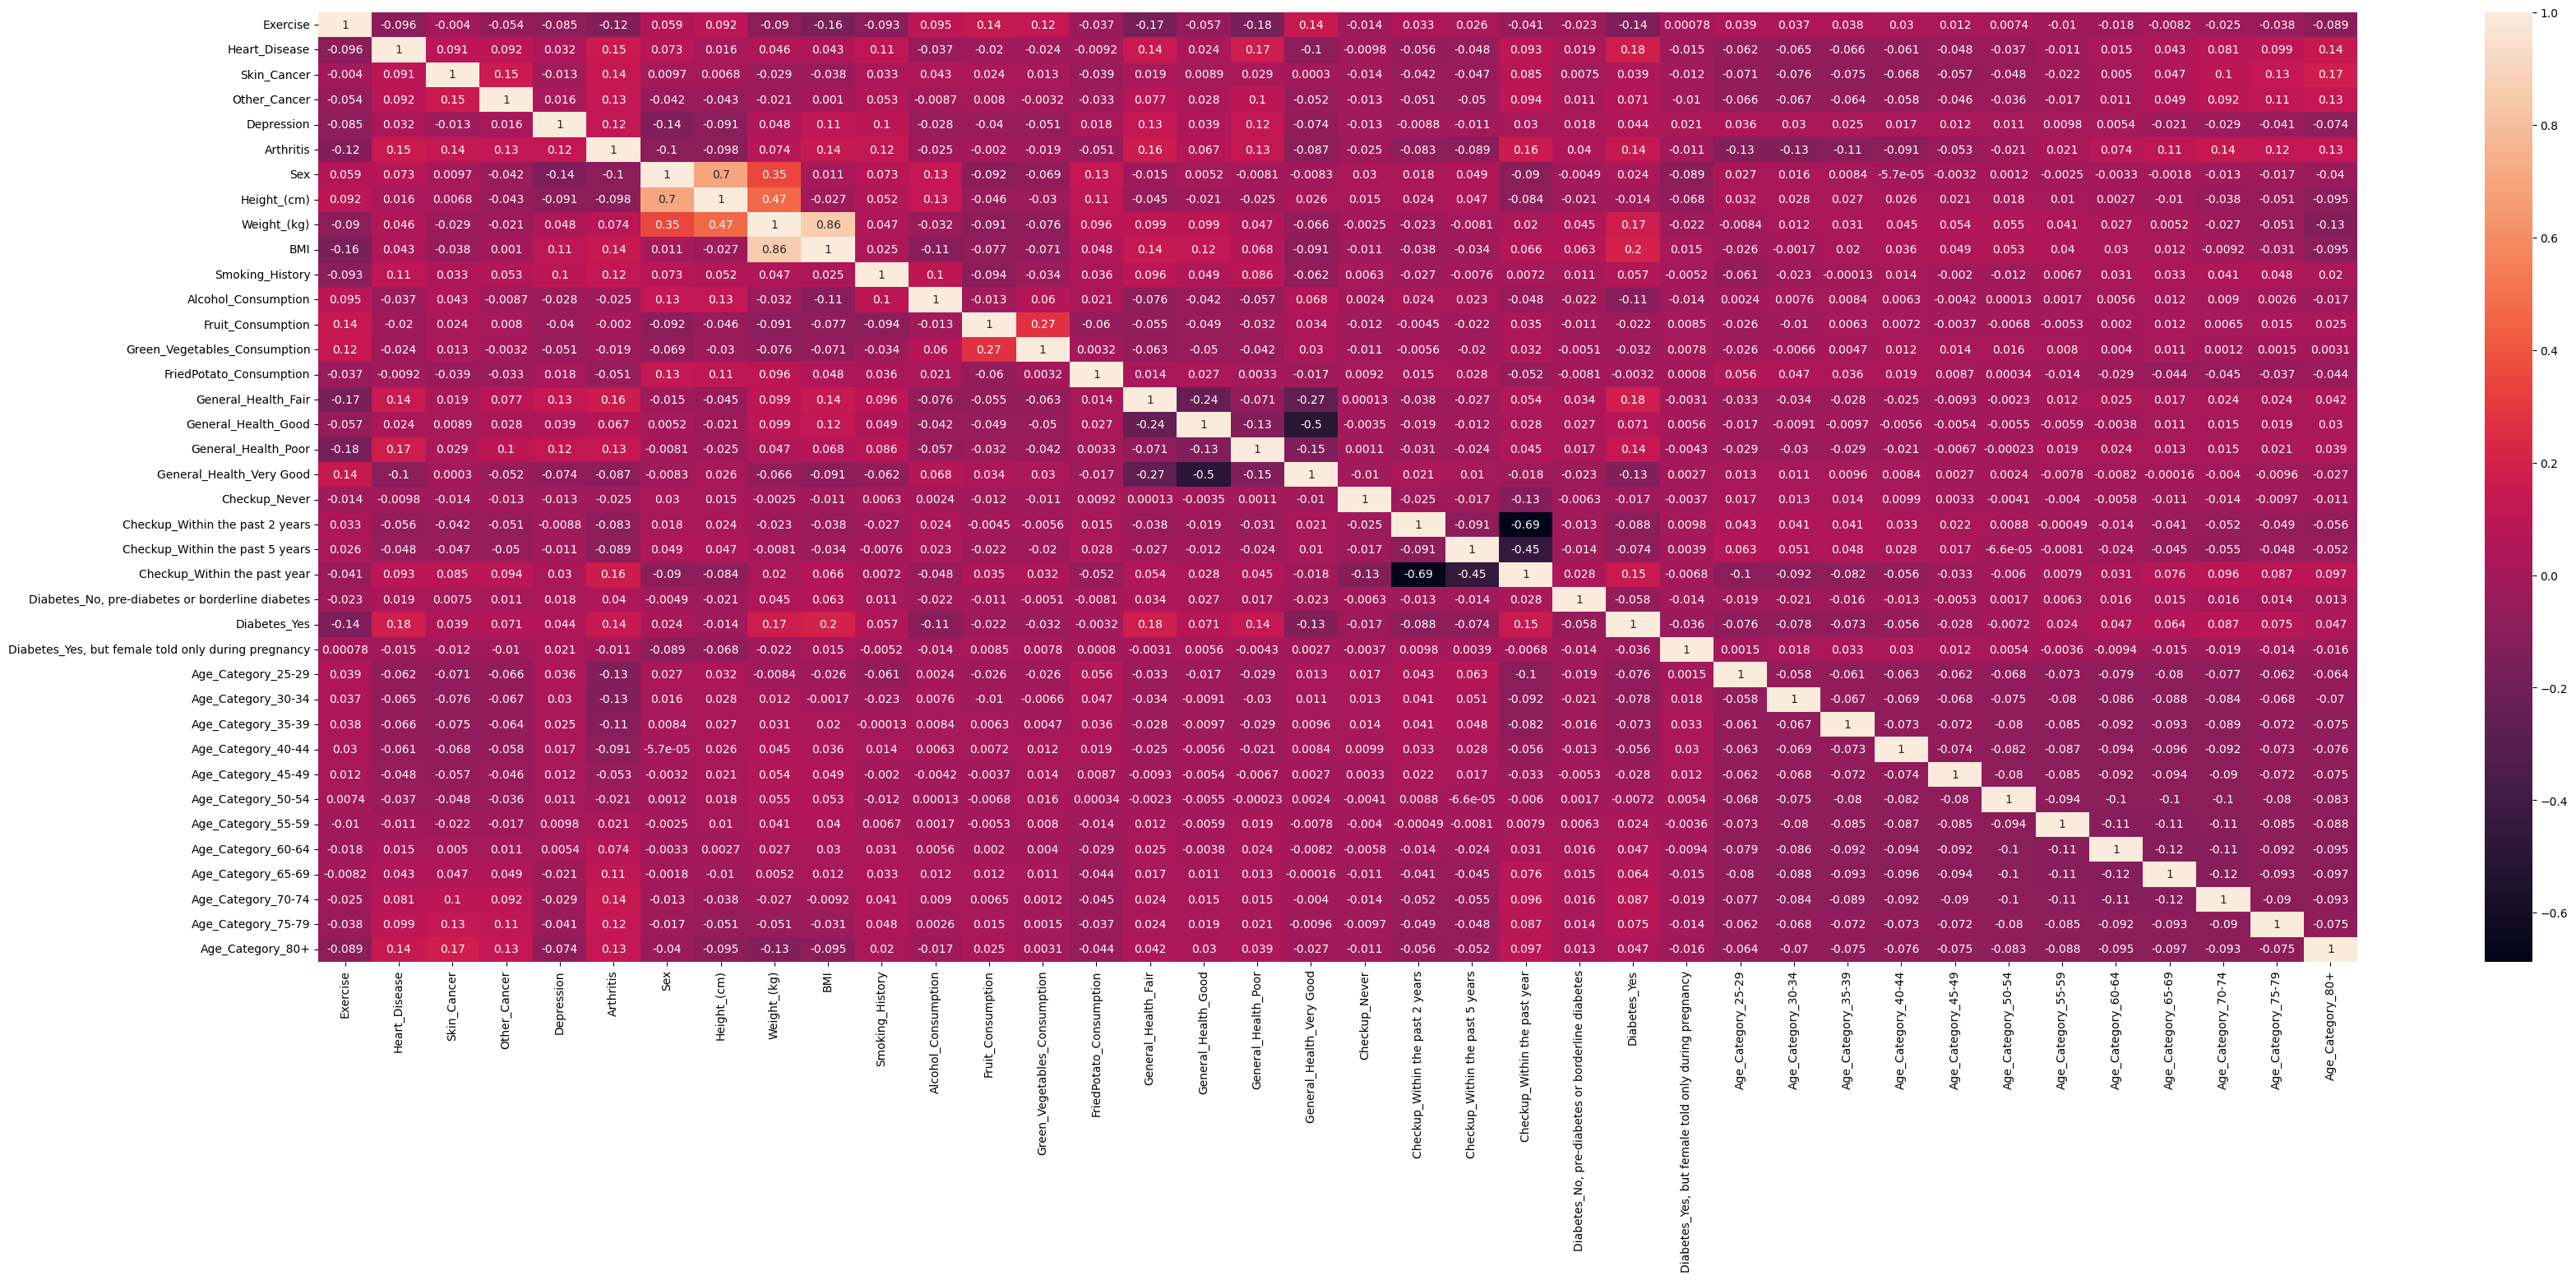

In [ ]:
plt.figure(figsize=(40,15))
sns.heatmap(data.corr(),annot=True)

In [ ]:
y_res.value_counts()

In [ ]:
X_res.value_counts()

Gradient Bossting Classifier


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gbc = GradientBoostingClassifier()

In [ ]:
 gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [ ]:
y_pred6 = gbc.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred6)

0.8931748912105143

Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred5 =rf.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred5)

0.9506791635101566

In [ ]:
precision_score(y_test,y_pred5)

NameError: ignored